## Imports

In [4]:
!pip install -U imbalanced-learn
!pip install xgboost

# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import VotingClassifier

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.Outlier_Detection as Outlier_Detection
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
#import Components.Data_Augmentation as Data_Augmentation
import Components.wrapper as wrapper
import Components.MultiSample as MultiSample


# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
#importlib.reload(Data_Augmentation)
importlib.reload(Outlier_Detection)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(wrapper)
importlib.reload(MultiSample)

     |████████████████████████████████| 167 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 148.9 MB 65 kB/s /s eta 0:00:01


<module 'Components.MultiSample' from '../Components/MultiSample.py'>

## Data Preprocessing

### Data Import

In [5]:
x_train, y_train = data_fetching.get_train_data()
x_test = data_fetching.get_test_data()

## Model

### Pipeline Setup

In [10]:
# we need: -scaling transformer -weighted loss function -multi-class model 
pipe1 = Pipeline([('scaling',StandardScaler()),
                 ('classification',
                  SVC(C=4.25,kernel='rbf',gamma=0.0001,shrinking=True,cache_size=1000,class_weight='balanced',probability=False))
                ])
pipe2 = Pipeline([('scaling',StandardScaler()),
                 ('classification', SVC(C=0.0004,kernel='linear',gamma='scale',shrinking=True,cache_size=1000,class_weight='balanced',probability=False))
                  ])
#pipe2 = Pipeline([('scaling',StandardScaler()),
 #                ('classification', MultiSample.MultiDownSyndrome(clf_type='svc-2',n_clf=30))])
vclf = VotingClassifier(estimators=[('rbf', pipe1), ('linear', pipe2)], voting='hard')

In [11]:
scores = cross_val_score(vclf, x_train, np.ravel(y_train), cv=10, scoring='balanced_accuracy',n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.73703704 0.73518519 0.72222222 0.70185185 0.68518519 0.72777778
 0.67314815 0.68055556 0.67592593 0.69351852]
Accuracy: 0.70 (+/- 0.05)


## Final prediction

Train Score: 0.8162962962962963


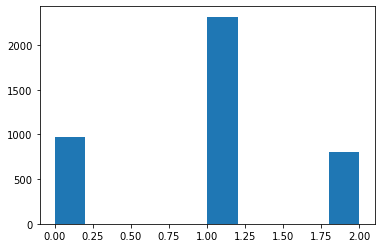

In [8]:
vclf.fit(x_train, np.ravel(y_train))
y_pred = vclf.predict(x_test)
plt.hist(y_pred)


y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])


In [9]:
y_pred_pd.to_csv('../../Predictions/SVM_big_voting.csv', index_label='id')

FileNotFoundError: [Errno 2] No such file or directory: '../../P/SVM_optimised_4.csv'